In [26]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from scipy.stats import norm

%matplotlib inline

In [27]:
def d(St, K, t, T, r, q, sigma):
    '''
    d2 = d1 - sigma * np.sqrt(T-t)
    '''
    return (np.log(St/K) + (T-t) * (r - q + (sigma ** 2) * 0.5)) / (sigma * np.sqrt(T-t))

def N(d):
    '''
    Standard normal cumulative distribution function.
    e^{-qt} * N(d1) = delta of call option
    e^{-qt} * (N(d1) - 1) = delta of put option
    N(d2) = risk-neutral probability (S_T >= K) i.e. probability option expires ITM
    '''
    return norm.cdf(d)

def dN(x):
    ''' 
    PDF of standard normal random variable x.
    '''
    return np.exp(-0.5 * x ** 2) / np.sqrt(2 * math.pi)

In [36]:
def delta_call(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    return np.exp(-q * (T-t)) * N(d1)

def delta_put(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    return np.exp(-q * (T-t)) * (N(d1) - 1)

In [37]:
def gamma(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    return np.exp(-q * (T-t)) * (dN(d1) / (St * sigma * np.sqrt(T-t)))

In [38]:
def theta_call(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    d2 = d1 - sigma * np.sqrt(T-t)
    
    return (-np.exp(-q * (T-t)) * (St * dN(d1) * sigma / (2 * np.sqrt(T-t))) - \
            r * K * np.exp(-r * (T-t)) * N(d2) + \
            q * St * np.exp(-q * (T-t)) * N(d1)
           )
    
def theta_put(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    d2 = d1 - sigma * np.sqrt(T-t)
    
    return (-np.exp(-q * (T-t)) * (St * dN(d1) * sigma / (2 * np.sqrt(T-t))) + \
            r * K * np.exp(-r * (T-t)) * N(-d2) - \
            q * St * np.exp(-q * (T-t)) * N(-d1)
           )

In [39]:
def rho_call(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    d2 = d1 - sigma * np.sqrt(T-t)
    
    return K * (T-t) * np.exp(-r * (T-t)) * N(d2)
    
def rho_put(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)
    d2 = d1 - sigma * np.sqrt(T-t)
    
    return -K * (T-t) * np.exp(-r * (T-t)) * N(-d2)

In [64]:
def vega(St, K, t, T, r, q, sigma):
    '''
    Parameters
    -------------
    St: initial stock price
    K: strike price
    t: start date
    T: maturity date
    r: r_f
    q: dividend yield
    sigma: vol
    '''
    d1 = d(St, K, t, T, r, q, sigma)  
    return St * np.exp(-q * (T-t)) * dN(d1) * np.sqrt(T-t)

#     d2 = d1 - sigma * np.sqrt(T-t)
#     return K * np.exp(-r * (T-t)) * Nd(d2) * np.sqrt(T-t)

In [55]:
def plot_greeks(function, greek):
    # Model Parameters
    St = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    q = 0     # dividend yield
    sigma = 0.2  # volatility

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, q, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

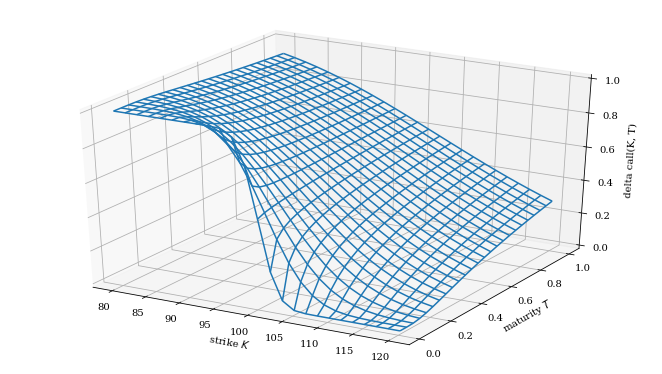

In [56]:
plot_greeks(delta_call, 'delta call')

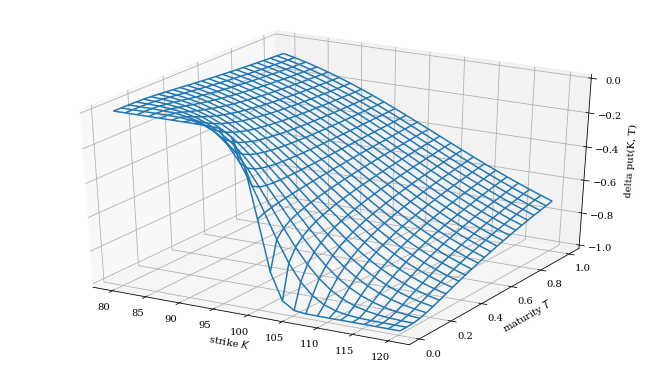

In [57]:
plot_greeks(delta_put, 'delta put')

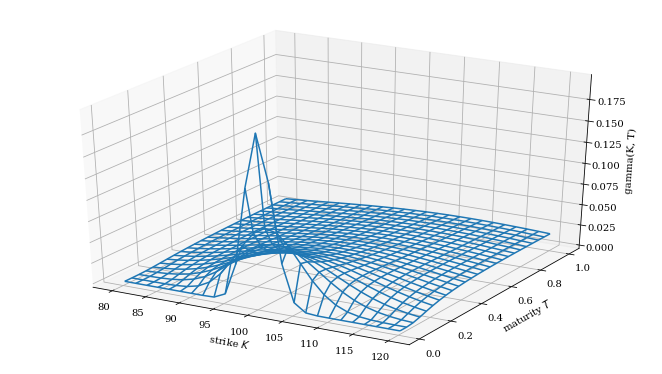

In [58]:
plot_greeks(gamma, 'gamma')

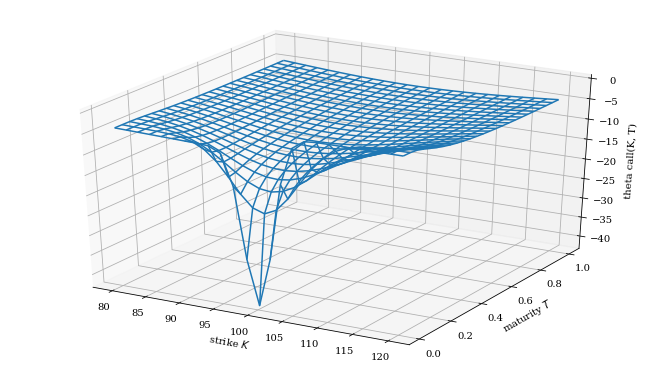

In [59]:
plot_greeks(theta_call, 'theta call')

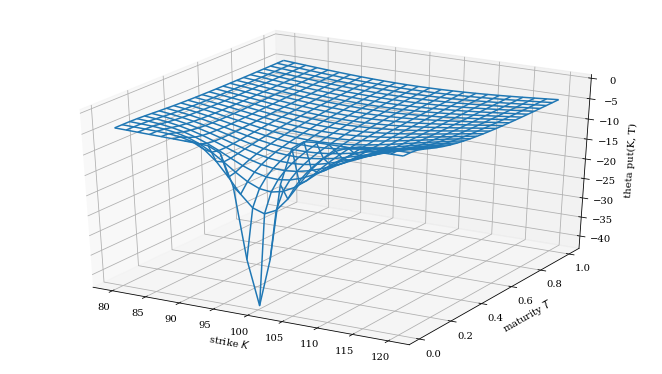

In [60]:
plot_greeks(theta_call, 'theta put')

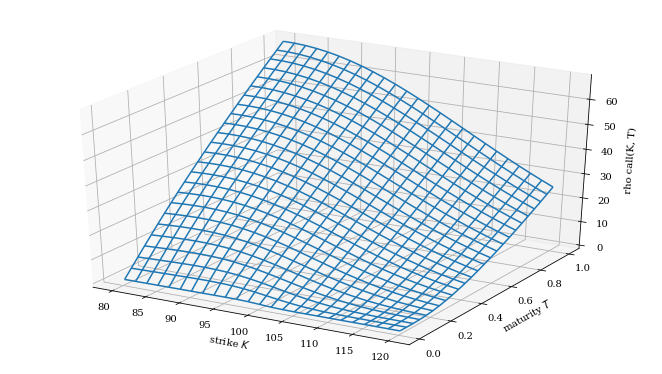

In [61]:
plot_greeks(rho_call, 'rho call')

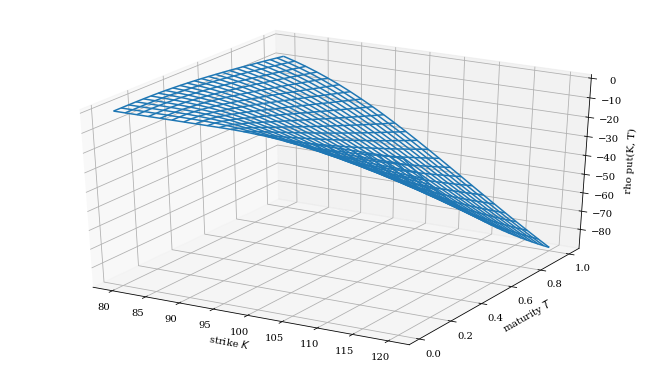

In [62]:
plot_greeks(rho_put, 'rho put')

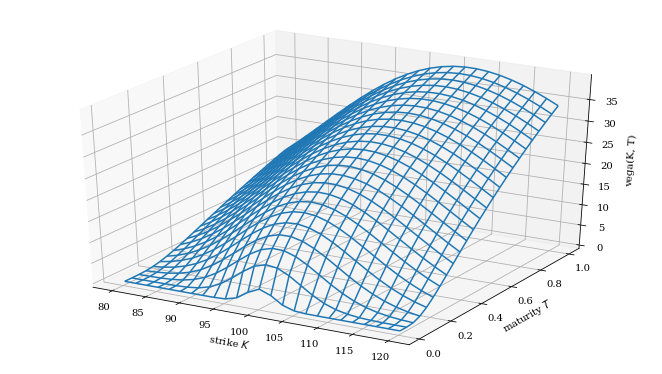

In [65]:
plot_greeks(vega, 'vega')